In [ ]:
import pandas as pd
df = pd.read_csv('product_summaries.csv')
df.dropna()
df['Summary'] = df['Summary'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in ["nan", "n"]]) if pd.notna(x) else x)
df['Summary'] = df['Summary'].apply(lambda x: str(x).replace("nan", "").replace("nanan", "") if pd.notna(x) else x)
df.to_csv('Final_Product_Summary.csv', index=False)

#Experiment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [ ]:
df = pd.read_csv('Reviews Data.csv')
df.drop(columns=['VALUE_RATING','QUALITY_RATING','URL','REVIEW_TIME','DATE_OF_CREATION','LAST_UPDATED_DATE','STATES','REVIEW_COUNT','PACK_SIZE','PRICE','REVIEW_DATE'], inplace=True)

df.head()


,SKU,PRODUCT_NAME,PRODUCT_CATEGORY,PRICE_RATING,REVIEW_CONTENT
0,8904417301922,Moisture Matte Longstay Lipstick - 2g | Citrus...,face,NaN,NaN
1,8904417301915,Moisture Matte Longstay Lipstick - 2g | Berryl...,Other,NaN,NaN
2,8904417301908,Moisture Matte Longstay Lipstick -2g | Cherry...,face,NaN,NaN
3,8904417301892,Moisture Matte Long Stay Lipstick - 2g | Pink ...,face,NaN,NaN
4,8904417303377,Vitamin C Daily Glow Face Cream - 80 g - Pack ...,skin,5.0,Like


In [ ]:
df=df.dropna()
df

,SKU,PRODUCT_NAME,PRODUCT_CATEGORY,PRICE_RATING,REVIEW_CONTENT
4,8904417303377,Vitamin C Daily Glow Face Cream - 80 g - Pack ...,skin,5.0,Like
5,8904417303377,Vitamin C Daily Glow Face Cream - 80 g - Pack ...,skin,5.0,I like this products
11,8904417302318,Ubtan Facial Kit with Turmeric & Saffron for G...,skin,5.0,All products are too good
12,8904417302318,Ubtan Facial Kit with Turmeric & Saffron for G...,skin,5.0,Nice products
13,8904417302318,Ubtan Facial Kit with Turmeric & Saffron for G...,skin,5.0,Nice products
...,...,...,...,...,...
26131,8906087771944,Bye Bye Blemishes Face Cream for Reducing Pigm...,face,5.0,Very nice & effective product
26132,8906087771944,Bye Bye Blemishes Face Cream for Reducing Pigm...,face,5.0,great
26133,8906087771944,Bye Bye Blemishes Face Cream for Reducing Pigm...,face,5.0,Very Nice Product It removes all the black mar...
26134,8906087771944,Bye Bye Blemishes Face Cream for Reducing Pigm...,face,4.0,Service is awesome


<Axes: title={'center': 'Count of Price Ratings by Customers'}>

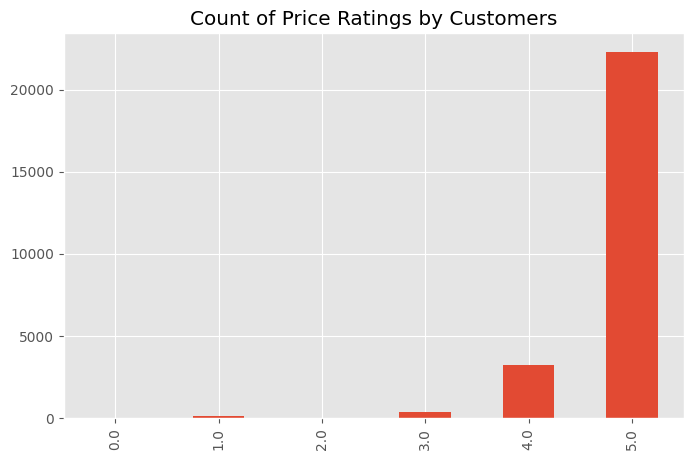

In [ ]:
df['PRICE_RATING'].value_counts().sort_index().plot(kind='bar', title='Count of Price Ratings by Customers', figsize=(8,5))

In [ ]:
df.insert(0, 'Id', np.arange(len(df)))
df

,Id,SKU,PRODUCT_NAME,PRODUCT_CATEGORY,PRICE_RATING,REVIEW_CONTENT
4,0,8904417303377,Vitamin C Daily Glow Face Cream - 80 g - Pack ...,skin,5.0,Like
5,1,8904417303377,Vitamin C Daily Glow Face Cream - 80 g - Pack ...,skin,5.0,I like this products
11,2,8904417302318,Ubtan Facial Kit with Turmeric & Saffron for G...,skin,5.0,All products are too good
12,3,8904417302318,Ubtan Facial Kit with Turmeric & Saffron for G...,skin,5.0,Nice products
13,4,8904417302318,Ubtan Facial Kit with Turmeric & Saffron for G...,skin,5.0,Nice products
...,...,...,...,...,...,...
26131,26086,8906087771944,Bye Bye Blemishes Face Cream for Reducing Pigm...,face,5.0,Very nice & effective product
26132,26087,8906087771944,Bye Bye Blemishes Face Cream for Reducing Pigm...,face,5.0,great
26133,26088,8906087771944,Bye Bye Blemishes Face Cream for Reducing Pigm...,face,5.0,Very Nice Product It removes all the black mar...
26134,26089,8906087771944,Bye Bye Blemishes Face Cream for Reducing Pigm...,face,4.0,Service is awesome


In [ ]:
from tqdm import tqdm
import pandas as pd
from scipy.special import softmax
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
# Download pytorch model
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

# Assuming df is your actual DataFrame
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['REVIEW_CONTENT']
        myid = row['Id']
        roberta_result = polarity_scores_roberta(text)

        # Check if the product already exists in the result dictionary
        if myid in res:
            for key, value in roberta_result.items():
                res[myid][key].append(value)
        else:
            res[myid] = roberta_result

    except Exception as e:
        print(f"Error processing row {i}: {e}")

# Calculate average sentiment scores for each unique product
product_sentiments = {}
for myid, scores_dict in res.items():
    product_id = df.loc[df['Id'] == myid, 'SKU'].values[0]
    if product_id not in product_sentiments:
        product_sentiments[product_id] = {
            'neg': [],
            'neu': [],
            'pos': [],
        }

    for key, value in scores_dict.items():
        product_sentiments[product_id][key.replace('roberta_', '')].append(value)

# Calculate average sentiment scores for each product
for product_id, scores_dict in product_sentiments.items():
    for key, values in scores_dict.items():
        avg_score = sum(values) / len(values) if len(values) > 0 else 0
        product_sentiments[product_id][key] = avg_score

# Display the results
for product_id, scores_dict in product_sentiments.items():
    print(f"Product ID: {product_id}")
    print(f"Avg Negative Score: {scores_dict['neg']}")
    print(f"Avg Neutral Score: {scores_dict['neu']}")
    print(f"Avg Positive Score: {scores_dict['pos']}")
    print()


100%|██████████| 31768/31768 [1:23:13<00:00,  6.36it/s]


Product ID: 8904417303377
Avg Negative Score: 0.10362763761077076
Avg Neutral Score: 0.3075080830603838
Avg Positive Score: 0.5888642966747284

Product ID: 8904417302318
Avg Negative Score: 0.03706979851371476
Avg Neutral Score: 0.17528897577098437
Avg Positive Score: 0.7876412251165935

Product ID: 8904417302301
Avg Negative Score: 0.04461515046811352
Avg Neutral Score: 0.2396518038585782
Avg Positive Score: 0.7157330513000488

Product ID: 8904417301762
Avg Negative Score: 0.035015576373552904
Avg Neutral Score: 0.1430500791175291
Avg Positive Score: 0.8219343647360802

Product ID: 8904417300338
Avg Negative Score: 0.007834720900282264
Avg Neutral Score: 0.06803151062689722
Avg Positive Score: 0.9241337736696005

Product ID: 8906087775829
Avg Negative Score: 0.005155431366909076
Avg Neutral Score: 0.058814618079101336
Avg Positive Score: 0.9360299390905044

Product ID: 8904417301106
Avg Negative Score: 0.01442564682136955
Avg Neutral Score: 0.08430007117105619
Avg Positive Score: 0.90

In [ ]:
from tqdm import tqdm
import pandas as pd
from scipy.special import softmax
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
# Download pytorch model
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

# Assuming df is your actual DataFrame
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['REVIEW_CONTENT']
        myid = row['Id']
        roberta_result = polarity_scores_roberta(text)

        # Check if the product already exists in the result dictionary
        if myid in res:
            for key, value in roberta_result.items():
                res[myid][key].append(value)
        else:
            res[myid] = roberta_result

    except Exception as e:
        print(f"Error processing row {i}: {e}")

# Calculate average sentiment scores for each unique product
product_sentiments = {}
for myid, scores_dict in res.items():
    product_id = df.loc[df['Id'] == myid, 'SKU'].values[0]
    product_name = df.loc[df['Id'] == myid, 'PRODUCT_NAME'].values[0]
    if product_id not in product_sentiments:
        product_sentiments[product_id] = {
            'name': product_name,
            'neg': [],
            'neu': [],
            'pos': [],
        }

    for key, value in scores_dict.items():
        product_sentiments[product_id][key.replace('roberta_', '')].append(value)

# Calculate average sentiment scores for each product
for product_id, scores_dict in product_sentiments.items():
    for key, values in scores_dict.items():
        if key != 'name':
            avg_score = sum(values) / len(values) if len(values) > 0 else 0
            product_sentiments[product_id][key] = avg_score

# Display the results
for product_id, scores_dict in product_sentiments.items():
    print(f"Product ID: {product_id}")
    print(f"Product Name: {scores_dict['name']}")
    print(f"Avg Negative Score: {scores_dict['neg']}")
    print(f"Avg Neutral Score: {scores_dict['neu']}")
    print(f"Avg Positive Score: {scores_dict['pos']}")
    print()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

  0%|          | 108/26091 [00:22<1:29:58,  4.81it/s]


KeyboardInterrupt: 

In [ ]:
# Create a DataFrame from the product_sentiments dictionary
result_df = pd.DataFrame.from_dict(product_sentiments, orient='index')

# Save the result to a CSV file
result_df.to_csv('sentiment_results1.csv')

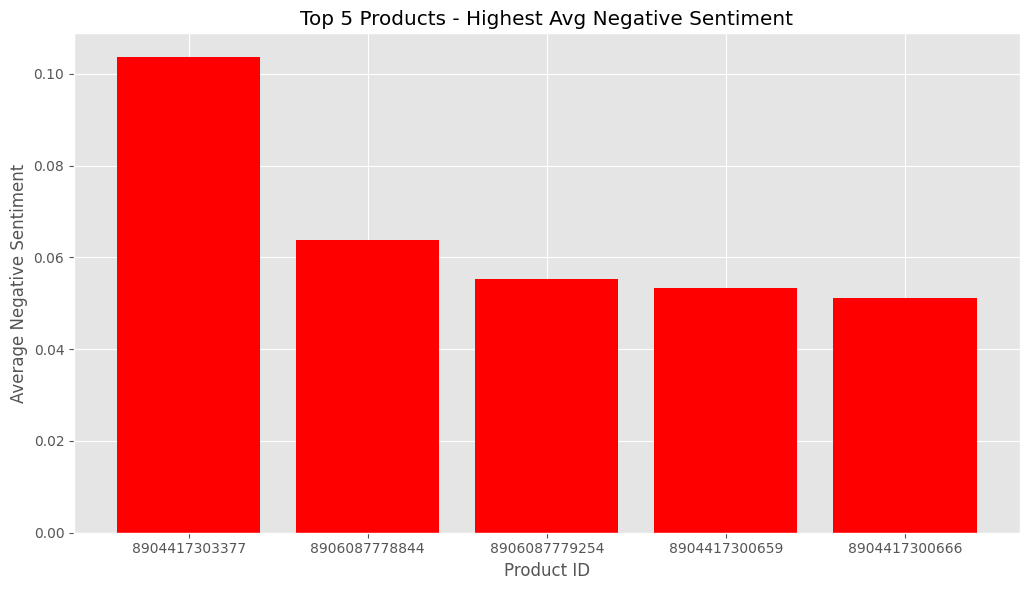

In [ ]:
import matplotlib.pyplot as plt

# Assuming product_sentiments is your dictionary with average sentiment scores
# Convert the dictionary to a DataFrame
result_df = pd.DataFrame.from_dict(product_sentiments, orient='index')

# Find top 5 products with the highest average negative sentiment scores
top_negative = result_df.nlargest(5, 'neg')

# Find top 5 products with the highest average positive sentiment scores
top_positive = result_df.nlargest(5, 'pos')

# Plotting
plt.figure(figsize=(20, 6))

# Top 5 products with highest average negative sentiment
plt.subplot(1, 2, 1)
plt.bar(top_negative.index, top_negative['neg'], color='red')
plt.title('Top 5 Products - Highest Avg Negative Sentiment')
plt.xlabel('Product ID')
plt.ylabel('Average Negative Sentiment')

# Top 5 products with highest average positive sentiment
plt.subplot(1, 2, 2)
plt.bar(top_positive.index, top_positive['pos'], color='green')
plt.title('Top 5 Products - Highest Avg Positive Sentiment')
plt.xlabel('Product ID')
plt.ylabel('Average Positive Sentiment')

plt.tight_layout()
plt.show()


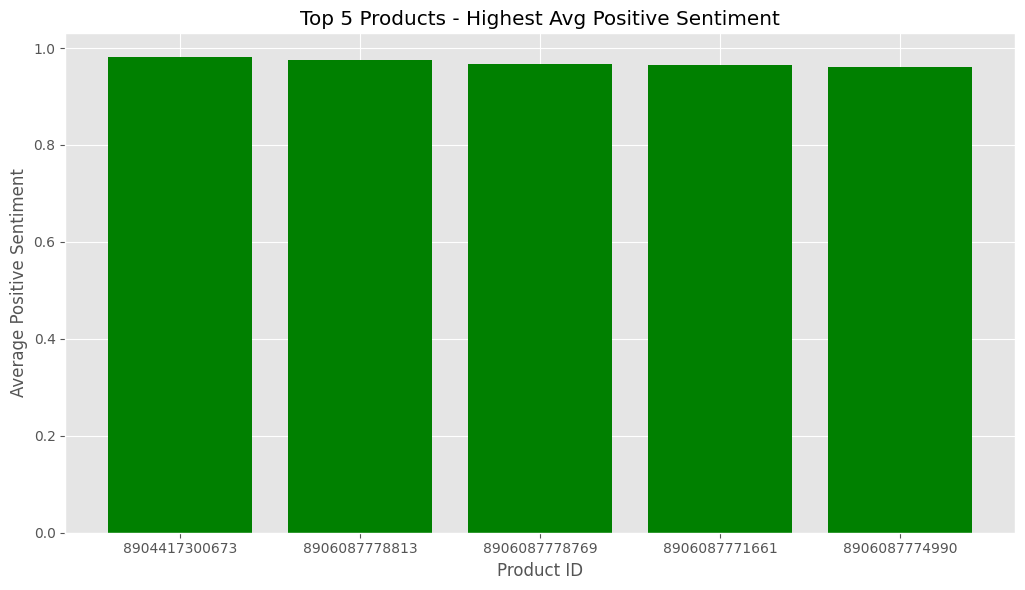

In [ ]:
# Find top 5 products with the highest average positive sentiment scores
top_positive = result_df.nlargest(5, 'pos')

# Plotting
plt.figure(figsize=(20, 6))

# Top 5 products with highest average positive sentiment
plt.subplot(1, 2, 2)
plt.bar(top_positive.index, top_positive['pos'], color='green')
plt.title('Top 5 Products - Highest Avg Positive Sentiment')
plt.xlabel('Product ID')
plt.ylabel('Average Positive Sentiment')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Assuming product_sentiments is your dictionary with average sentiment scores
# Convert the dictionary to a DataFrame
result_df = pd.DataFrame.from_dict(product_sentiments, orient='index')

# Find top 5 products with the highest average negative sentiment scores
top_negative = result_df.nlargest(5, 'neg')

# Find top 5 products with the highest average positive sentiment scores
top_positive = result_df.nlargest(5, 'pos')

# Create interactive bar plots with Plotly
fig = px.bar(top_negative, x=top_negative.index, y='neg', color='neg',
             labels={'neg': 'Average Negative Sentiment', 'x': 'Product ID'},
             title='Top 5 Products - Highest Avg Negative Sentiment',
             hover_name=top_negative.index,
             color_continuous_scale='Reds')

# Customize layout
fig.update_layout(
    xaxis_title='Product ID',
    yaxis_title='Average Negative Sentiment',
    xaxis=dict(tickmode='array', tickvals=top_negative.index, ticktext=top_negative.index),
    yaxis=dict(range=[0, 1]),
    coloraxis_colorbar=dict(title='Negative Sentiment', tickformat=".2%"),
)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Assuming product_sentiments is your dictionary with average sentiment scores
# Convert the dictionary to a DataFrame
result_df = pd.DataFrame.from_dict(product_sentiments, orient='index')

# Find top 5 products with the highest average positive sentiment scores
top_positive = result_df.nlargest(5, 'pos')

# Create custom color scale
custom_color_scale = ['#66ff66', '#4dff4d', '#33ff33', '#1aff1a', '#00ff00']

# Create interactive bar plots with Plotly
fig = px.bar(top_positive, x=top_positive.index, y='pos',
             color='pos', color_continuous_scale=custom_color_scale,
             labels={'pos': 'Average Positive Sentiment', 'x': 'Product ID'},
             title='Top 5 Products - Highest Avg Positive Sentiment',
             hover_name=top_positive.index)

# Customize layout
fig.update_layout(
    xaxis_title='Product ID',
    yaxis_title='Average Positive Sentiment',
    xaxis=dict(tickmode='array', tickvals=top_positive.index, ticktext=top_positive.index),
    yaxis=dict(range=[0, 1]),
    coloraxis_colorbar=dict(title='Positive Sentiment', tickformat=".2%"),
)

# Show the plot
fig.show()


# STEP 0 : Read Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [ ]:
df = pd.read_csv('Service.csv')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
df.head()

In [ ]:
df['REVIEW_CONTENT'].values[2]

'I got this product delivered yesterday and I liked the packaging. This is the first time I have ordered anything from Mamaearth and I had a nice experience. Great service!'

<Axes: title={'center': 'Count of Price Ratings by Customers'}>

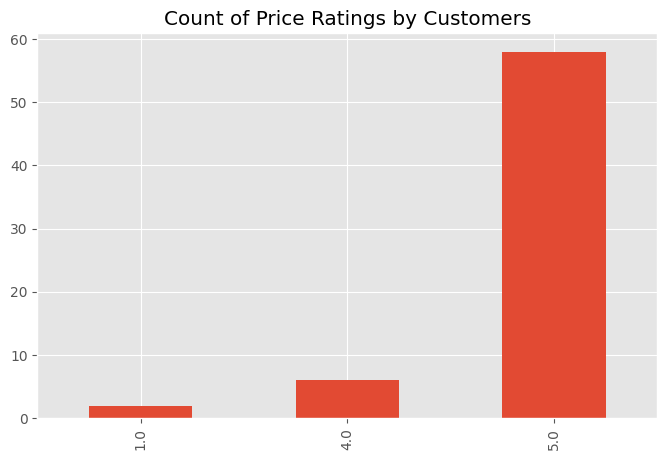

In [ ]:
df['PRICE_RATING'].value_counts().sort_index().plot(kind='bar', title='Count of Price Ratings by Customers', figsize=(8,5))

## Basic NLTK

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
example = df['REVIEW_CONTENT'][10]
print(example)

I love this product very much and I love to say that you guys doing a great job i am very happy by the services and will keep on purchasing 


In [ ]:
tokens=nltk.word_tokenize(example)
tokens

['I',
 'love',
 'this',
 'product',
 'very',
 'much',
 'and',
 'I',
 'love',
 'to',
 'say',
 'that',
 'you',
 'guys',
 'doing',
 'a',
 'great',
 'job',
 'i',
 'am',
 'very',
 'happy',
 'by',
 'the',
 'services',
 'and',
 'will',
 'keep',
 'on',
 'purchasing']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('very', 'RB'),
 ('much', 'JJ'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('to', 'TO')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  love/VBP
  this/DT
  product/NN
  very/RB
  much/JJ
  and/CC
  I/PRP
  love/VBP
  to/TO
  say/VB
  that/IN
  you/PRP
  guys/VBP
  doing/VBG
  a/DT
  great/JJ
  job/NN
  i/NN
  am/VBP
  very/RB
  happy/JJ
  by/IN
  the/DT
  services/NNS
  and/CC
  will/MD
  keep/VB
  on/IN
  purchasing/NN)


# STEP 1 : Vader - Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('The product is very bad')

{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.5849}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.9552}

In [ ]:
# Run the Polarity score on the dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['REVIEW_CONTENT']
    res[i] = sia.polarity_scores(text)

  0%|          | 0/66 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})

In [ ]:
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,SKU,PRODUCT_NAME,PRICE,PRODUCT_CATEGORY,PACK_SIZE,...,REVIEW_DATE,REVIEW_TIME,PRICE_RATING,QUALITY_RATING,VALUE_RATING,REVIEW_CONTENT,URL,DATE_OF_CREATION,LAST_UPDATED_DATE,STATES
0,0,0.0,0.744,0.256,0.8516,8906087779889,Vitamin C Foaming Face Wash Combo Pack with Re...,599.00,skin,150ml,...,2022-07-05,10:37:34,5.0,0.0,0.0,I received this face wash today…so quick servi...,https://mamaearth.in/product/vitamin-c-foaming...,2022-05-16,2022-09-14,National Capital Territory of Delhi
1,1,0.0,0.732,0.268,0.8313,8906087778790,Mamaearth ME Deo for a Scent That’s Unique to ...,299.00,skin,120ml,...,2022-07-27,06:59:25,5.0,0.0,0.0,I got this product on sale and I liked it when...,https://mamaearth.in/product/mamaearth-me-deo-...,2022-05-11,2022-09-14,Maharashtra
2,2,0.0,0.688,0.312,0.8748,8906087779094,Hair Oil Booster - 30 ml | Rice,349.00,hair,30ml,...,2022-07-05,07:45:31,4.0,0.0,0.0,I got this product delivered yesterday and I l...,https://mamaearth.in/product/hair-oil-booster-...,2022-04-29,2022-09-01,Chandigarh
3,3,0.0,0.684,0.316,0.9550,8906087779094,Hair Oil Booster - 30 ml | Rice,349.00,hair,30ml,...,2022-07-05,07:45:17,5.0,0.0,0.0,What an amazing product by the team!!\r\nOvera...,https://mamaearth.in/product/hair-oil-booster-...,2022-04-29,2022-09-01,Goa
4,4,0.0,0.727,0.273,0.9080,8906087779094,Hair Oil Booster - 30 ml | Rice,349.00,hair,30ml,...,2022-07-05,07:44:44,5.0,0.0,0.0,This is my first purchase from Mamaearth. My e...,https://mamaearth.in/product/hair-oil-booster-...,2022-04-29,2022-09-01,Karnataka


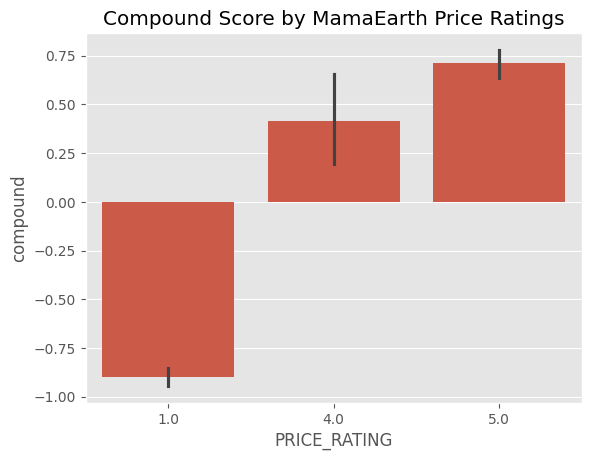

In [ ]:
# Plot Vader Result by comparing with Price rating

ax = sns.barplot(data=vaders, x='PRICE_RATING', y='compound')
ax.set_title('Compound Score by MamaEarth Price Ratings')
plt.show()

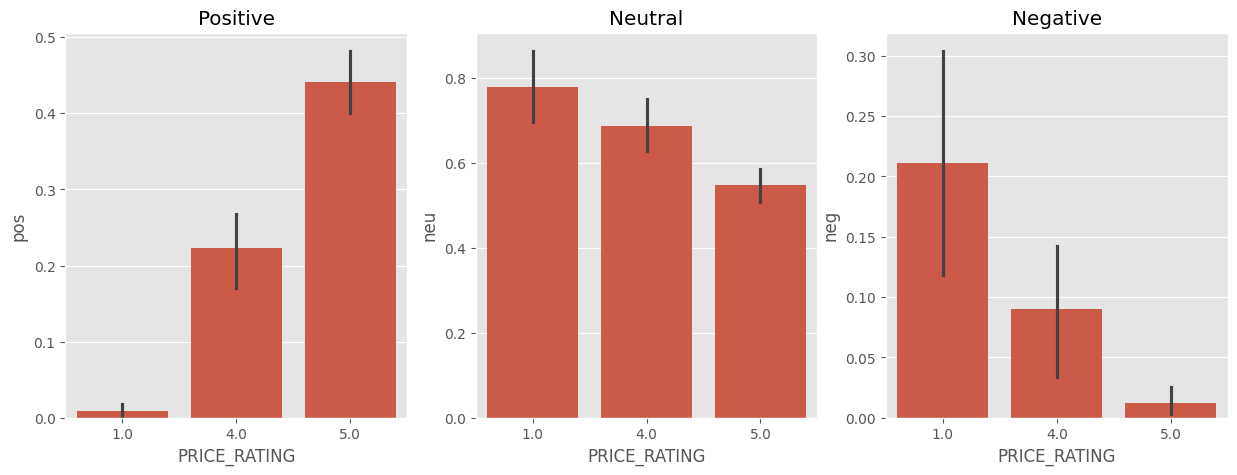

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'vaders'
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Positive sentiment
sns.barplot(data=vaders, x='PRICE_RATING', y='pos', ax=axs[0])
axs[0].set_title('Positive')

# Neutral sentiment
sns.barplot(data=vaders, x='PRICE_RATING', y='neu', ax=axs[1])
axs[1].set_title('Neutral')

# Negative sentiment
sns.barplot(data=vaders, x='PRICE_RATING', y='neg', ax=axs[2])
axs[2].set_title('Negative')

plt.show()


In [ ]:
from scipy.special import softmax
from transformers import AutoModel, AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [ ]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
# Download pytorch model
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
print(example)

I love this product very much and I love to say that you guys doing a great job i am very happy by the services and will keep on purchasing 


In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0017982217, 'roberta_neu': 0.0051325136, 'roberta_pos': 0.9930693}


In [ ]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
  }
  return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['REVIEW_CONTENT']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value

    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid]=both
  except RuntimeError:
    print(f'Broke for id {myid}')

  0%|          | 0/66 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.tail(20)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,SKU,PRODUCT_NAME,...,REVIEW_DATE,REVIEW_TIME,PRICE_RATING,QUALITY_RATING,VALUE_RATING,REVIEW_CONTENT,URL,DATE_OF_CREATION,LAST_UPDATED_DATE,STATES
46,46,0.000,0.698,0.302,0.7564,0.001211,0.007149,0.991640,8906087772569,Vitamin C Sleeping Mask with Aloe Vera for Ski...,...,2022-01-15,08:36:20,5.0,0.0,0.0,M Really sooo happy with your service of buy 1...,https://mamaearth.in/product/vitamin-c-sleepin...,2021-03-25,2022-09-17,Andhra Pradesh
47,47,0.304,0.696,0.000,-0.8519,0.893778,0.098677,0.007545,8906087771821,Argan Shampoo with Argan and Apple Cider Vineg...,...,2020-07-12,05:30:28,1.0,0.0,0.0,Ordered a argan shampoo with mama but I receiv...,https://mamaearth.in/product/argan-shampoo-wit...,2021-03-25,2022-09-01,Jammu and Kashmir
48,48,0.125,0.599,0.276,0.5471,0.103057,0.255145,0.641797,8906087772811,Moisturizing Bathing Bar (Pack of 2) and Gentl...,...,2020-08-19,10:18:50,5.0,0.0,0.0,Hi mamaearth your products is very good but pa...,https://mamaearth.in/product/moisturizing-bath...,2021-03-25,2022-09-12,Gujarat
49,49,0.000,0.751,0.249,0.7420,0.001696,0.010425,0.987879,8906087772491,Onion Hair Oil for Hair Regrowth and Hair Fall...,...,2021-09-26,08:23:30,4.0,0.0,0.0,This product is really nice. I received it tod...,https://mamaearth.in/product/onion-hair-oil-fo...,2021-03-25,2022-09-12,National Capital Territory of Delhi
50,50,0.000,0.339,0.661,0.5994,0.005513,0.061265,0.933222,8906087772439,Aloe Vera Gel for Skin and Hair - 300ml,...,2022-01-14,01:19:47,5.0,0.0,0.0,Super service...Best quality..,https://mamaearth.in/product/aloe-vera-gel-for...,2021-03-25,2022-09-12,Karnataka
51,51,0.000,0.528,0.472,0.9118,0.001974,0.008773,0.989253,8906087771982,Bye Bye Dark Circles Eye Cream with Cucumber a...,...,2021-12-09,15:25:07,5.0,0.0,0.0,Tq so much mamarearth for fast service . I m h...,https://mamaearth.in/product/bye-bye-dark-circ...,2021-03-25,2022-09-12,Maharashtra
52,52,0.000,0.495,0.505,0.9809,0.001567,0.005885,0.992548,8906087771982,Bye Bye Dark Circles Eye Cream with Cucumber a...,...,2021-11-07,13:57:49,5.0,0.0,0.0,Truly natural or light weight product for dark...,https://mamaearth.in/product/bye-bye-dark-circ...,2021-03-25,2022-09-12,Andhra Pradesh
53,53,0.113,0.833,0.054,-0.5944,0.776096,0.183064,0.040840,8906087771982,Bye Bye Dark Circles Eye Cream with Cucumber a...,...,2020-07-08,06:16:54,5.0,0.0,0.0,Few days back I ordered 4 items....today when ...,https://mamaearth.in/product/bye-bye-dark-circ...,2021-03-25,2022-09-12,Tamil Nadu
54,54,0.000,0.388,0.612,0.8360,0.003843,0.012703,0.983454,8906087772187,Onion Shampoo with Onion & Plant Keratin for H...,...,2021-09-27,08:18:15,5.0,0.0,0.0,Love your service ± product is omg.... Excellent,https://mamaearth.in/product/onion-shampoo-for...,2021-03-25,2022-09-12,Punjab
55,55,0.000,0.500,0.500,0.8750,0.002205,0.016827,0.980968,8906087771883,Onion Hair Oil for Hair Regrowth and Hair Fall...,...,2021-06-22,09:15:50,5.0,0.0,0.0,Product is amazing and the service thwy provid...,https://mamaearth.in/product/onion-hair-oil-fo...,2021-03-25,2022-09-12,Arunachal Pradesh


## Comparing Scores between the model

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'SKU', 'PRODUCT_NAME',
       'PRICE', 'PRODUCT_CATEGORY', 'PACK_SIZE', 'REVIEW_COUNT', 'REVIEW_DATE',
       'REVIEW_TIME', 'PRICE_RATING', 'QUALITY_RATING', 'VALUE_RATING',
       'REVIEW_CONTENT', 'URL', 'DATE_OF_CREATION', 'LAST_UPDATED_DATE',
       'STATES'],
      dtype='object')

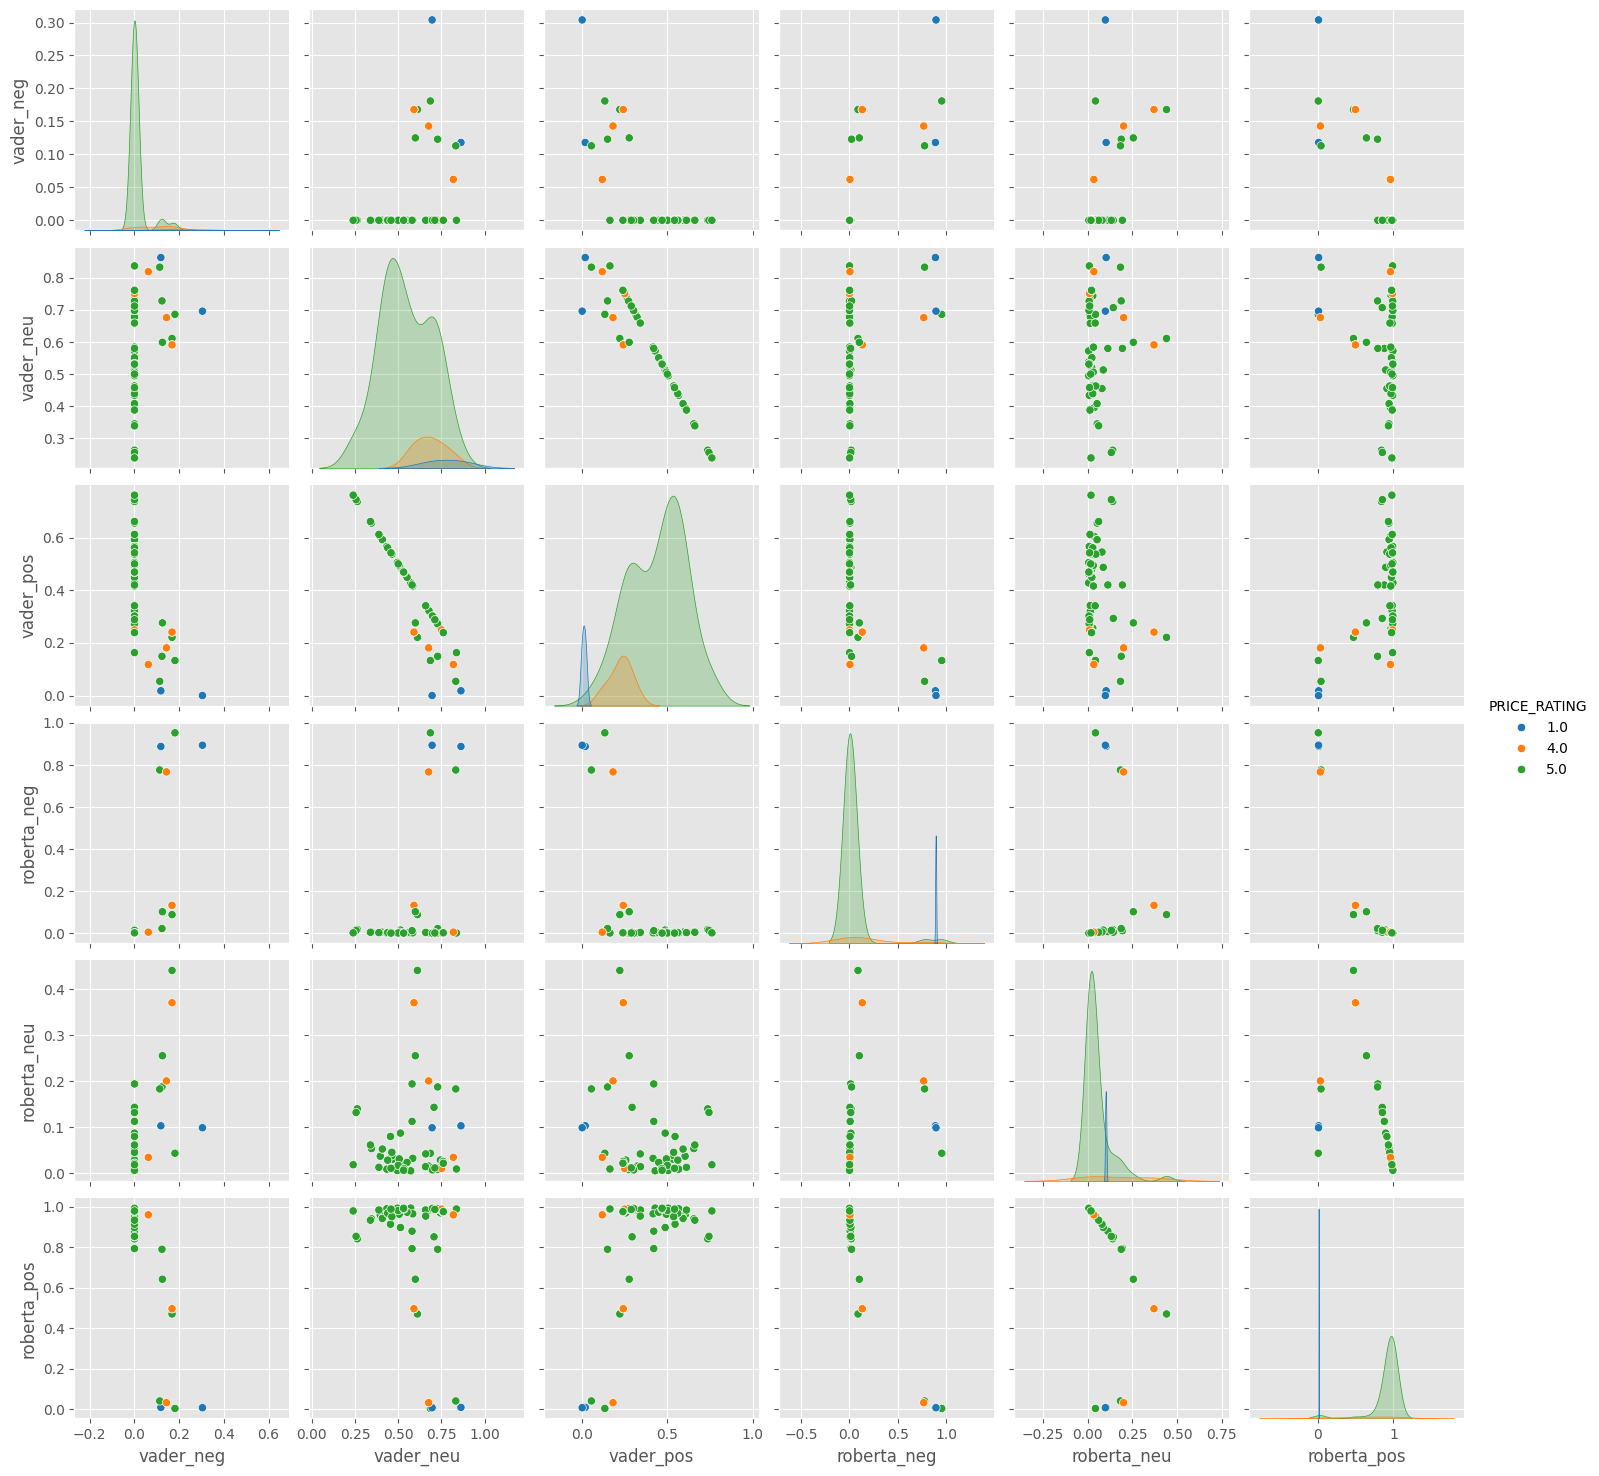

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg','vader_neu','vader_pos',
                   'roberta_neg','roberta_neu','roberta_pos'],
             hue='PRICE_RATING',
             palette='tab10')
plt.show()

In [ ]:
results_df.query('PRICE_RATING==5') \
    .sort_values('roberta_neg',ascending=False)['REVIEW_CONTENT'].values[0]

'Product is not good ,my hair is falling more after using this product,and when I contacted customer service ,he said rudely to not use it , I want to talk from higher officials of mama earth ,so kindly solve my issue'

In [ ]:
results_df.query('PRICE_RATING==5') \
    .sort_values('vader_neg',ascending=False)['REVIEW_CONTENT'].values[0]

'Product is not good ,my hair is falling more after using this product,and when I contacted customer service ,he said rudely to not use it , I want to talk from higher officials of mama earth ,so kindly solve my issue'

In [ ]:
results_df[['roberta_neg','REVIEW_CONTENT']]

,roberta_neg,REVIEW_CONTENT
0,0.002070,I received this face wash today…so quick servi...
1,0.002120,I got this product on sale and I liked it when...
2,0.001393,I got this product delivered yesterday and I l...
3,0.001448,What an amazing product by the team!!\r\nOvera...
4,0.001290,This is my first purchase from Mamaearth. My e...
...,...,...
61,0.003029,Osam face wash.. Love mama earth products.. An...
62,0.003029,Osam face wash.. Love mama earth products.. An...
63,0.005957,Totally loved the service n quality of the pro...
64,0.001538,just fall in love with ur products whatever I'...


In [ ]:
combined_text = df['REVIEW_CONTENT'].str.cat(sep=' ')

# Print the result
print(combined_text)

I received this face wash today…so quick service…ordered it yesterday and got this delivered today….
Lovely packaging and good quantity at a fair price….It comes with a combo refill pack….Cherry on the top!?  I got this product on sale and I liked it when I received it.. Such a nice packaging ... .it was handled and delivered so carefully…no spills at all. Good service!
 I got this product delivered yesterday and I liked the packaging. This is the first time I have ordered anything from Mamaearth and I had a nice experience. Great service! What an amazing product by the team!!
Overall this product is so so good and pure natural. Mamaearth never compromises with its product in fact it improves shipping service and customer service always. This product has Keratin in it which is very important for hair growth. This is my first purchase from Mamaearth. My experience was wonderful…fast service and best packaging. The fragrance is mild and soothing. It is not at all sticky and greasy. My ha

experminet


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Initialize T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

# Define your combined text

# Preprocess combined text if needed

# Tokenize input text
inputs = tokenizer.encode("summarize: " + combined_text, return_tensors="pt", max_length=512, truncation=True)

# Generate summary
summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

# Decode and print summary
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Post-process summary if needed

print(summary)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


this is my first purchase from mamaearth and my experience was wonderful...fast service and best packaging. the fragrance is mild and soothing. It is not at all sticky and greasy. my hair length has also improved. I am so happy and satisfied with this lip serum.


In [ ]:
# Query all ratings and sort by roberta_neg
selected_review = results_df.query('PRICE_RATING in [1, 2, 3, 4, 5]') \
    .sort_values('roberta_neg', ascending=False)['REVIEW_CONTENT'].values[0]

# Print or use the selected review content as needed
print(selected_review)



Product is not good ,my hair is falling more after using this product,and when I contacted customer service ,he said rudely to not use it , I want to talk from higher officials of mama earth ,so kindly solve my issue


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Initialize T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

# Define your combined text

# Preprocess combined text if needed

# Tokenize input text
inputs = tokenizer.encode("summarize: " + selected_review, return_tensors="pt", max_length=512, truncation=True)

# Generate summary
summary_ids = model.generate(inputs, max_length=25, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)

# Decode and print summary
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Post-process summary if needed

print(summary)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1158: UserWarning: Unfeasible length constraints: `min_length` (30) is larger than the maximum possible length (25). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


product is not good,my hair is falling more after using it. when i contacted customer service


In [ ]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization")

# Define your text


# Generate a summary
summary = summarizer(selected_review, max_length=40, min_length=20, do_sample=False)

# Print the summary
print(summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Product is not good, my hair is falling more after using this product,and when I contacted customer service ,he said rudely to not use it . I want to talk from higher


In [ ]:
!pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 9.2 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21691 sha256=c8ccf85653abcf527c0bd64535a452d4d2df8b8a08a37ab9253cee7aa3da34ed
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=b8eedac5ac28d12dbfdad5e2383f5b092a83da210690bf34c405a264ef53a3d2
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt
